# Spectral Coclustering analysis of FRI Data

Here, I apply the analysis I've learned from the EdX course on [Using Python for Research](https://www.edx.org/course/using-python-research-harvardx-ph526x) by JP Onnela.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("5wines0720.csv")

In [3]:
data.shape

(80, 19)

#### Rearrange dataframe

Rearrange the dataframe so that there is only one reading per wine (take the mean of the reps), the index are wines, and the columns are sensors.

In [4]:
# To do this, getting the list of wines (observations) and sensors (features)
wines = data["Unnamed: 0"].unique()
sensors = list(data.iloc[:, 1:].columns)
print("Wines\n", wines)
print("Sensors\n", sensors)

Wines
 ['Beaujolais' 'Cabernet' 'Merlot' 'Pinot Noir' 'Shiraz' 'Zinfandel BS'
 'Zinfandel BT' 'Zinfandel C' 'Zinfandel R' 'Zinfandel SV']
Sensors
 ['SEL1-BN 430', 'RN8-BN 430', 'SEL1-PC 430', 'RN8-PC 430', 'SEL1-CC 430', 'RN8-CC 430', 'SEL1-BN 444', 'RN8-BN 444', 'SEL1-PC 444', 'RN8-PC 444', 'SEL1-CC 444', 'RN8-CC 444', 'SEL1-BN 560', 'RN8-BN 560', 'SEL1-PC 560', 'RN8-PC 560', 'SEL1-CC 560', 'RN8-CC 560']


In [5]:
# Set index to be the wines
data_sensor_wine = data.set_index("Unnamed: 0")
data_sensor_wine.head()

,SEL1-BN 430,RN8-BN 430,SEL1-PC 430,RN8-PC 430,SEL1-CC 430,RN8-CC 430,SEL1-BN 444,RN8-BN 444,SEL1-PC 444,RN8-PC 444,SEL1-CC 444,RN8-CC 444,SEL1-BN 560,RN8-BN 560,SEL1-PC 560,RN8-PC 560,SEL1-CC 560,RN8-CC 560
Unnamed: 0,,,,,,,,,,,,,,,,,,
Beaujolais,0.0829,0.0823,0.4011,0.4234,0.8003,0.8233,0.0798,0.0802,0.3892,0.4116,0.7658,0.7876,0.2673,0.2699,0.2975,0.3121,0.0892,0.0919
Beaujolais,0.0817,0.0837,0.4054,0.4270,0.8135,0.8174,0.0782,0.0812,0.3941,0.4146,0.7784,0.7821,0.2698,0.2720,0.3025,0.3159,0.0908,0.0896
Beaujolais,0.0826,0.0915,0.4109,0.4332,0.8193,0.8298,0.0796,0.0878,0.3980,0.4209,0.7828,0.7933,0.2708,0.2812,0.3059,0.3222,0.0903,0.0903
Beaujolais,0.0818,0.0887,0.3983,0.4352,0.8185,0.8313,0.0785,0.0851,0.3854,0.4229,0.7819,0.7956,0.2677,0.2789,0.2949,0.3236,0.0899,0.0909
Beaujolais,0.0814,0.0858,0.4043,0.4348,0.8132,0.7838,0.0783,0.0844,0.3916,0.4229,0.7767,0.7486,0.2675,0.2755,0.3028,0.3248,0.0897,0.0854


In [6]:
# Create a dictionary to use for creating the new dataframe while 
# calculating the mean of the absorbance readings for the 8 reps.
# The dictionary has sensor as key and a list of averages for each wine as value.
means = {}
for sensor in sensors:
    mean_sensor = [] # create list of means per sensor
    for wine in wines:
        mean_sensor.append(data_sensor_wine.loc[wine, sensor].mean())
    means[sensor] = mean_sensor

In [7]:
# Actual creation of the arranged dataframe, with wines a index and sensors has columns
# We now have only one line per wine compared to 8 reps per wine. The data are mean values only.
data_means = pd.DataFrame(means, index=wines)
data_means

,SEL1-BN 430,RN8-BN 430,SEL1-PC 430,RN8-PC 430,SEL1-CC 430,RN8-CC 430,SEL1-BN 444,RN8-BN 444,SEL1-PC 444,RN8-PC 444,SEL1-CC 444,RN8-CC 444,SEL1-BN 560,RN8-BN 560,SEL1-PC 560,RN8-PC 560,SEL1-CC 560,RN8-CC 560
Beaujolais,0.081963,0.084875,0.403300,0.432088,0.826725,0.826600,0.078487,0.082462,0.390838,0.419913,0.790100,0.790613,0.268587,0.272675,0.299912,0.320462,0.091450,0.090512
Cabernet,0.070288,0.070175,0.508737,0.499012,0.864000,0.849463,0.068825,0.069125,0.494100,0.484775,0.829450,0.815638,0.258337,0.251300,0.392037,0.386288,0.096738,0.098325
Merlot,0.081763,0.080550,0.418150,0.425438,0.799825,0.818912,0.077088,0.079700,0.405488,0.413375,0.768225,0.788025,0.270838,0.264913,0.310412,0.318887,0.097213,0.104200
Pinot Noir,0.069800,0.069137,0.518200,0.518537,0.875862,0.854387,0.067425,0.067513,0.501925,0.502000,0.839925,0.820138,0.249000,0.241050,0.402388,0.408212,0.106762,0.107325
Shiraz,0.080575,0.080512,0.424438,0.429825,0.802225,0.803438,0.077088,0.078625,0.410788,0.416875,0.772825,0.775362,0.260100,0.261925,0.318425,0.322350,0.115238,0.117587
Zinfandel BS,0.070600,0.072837,0.478700,0.486075,0.820512,0.812838,0.067513,0.070050,0.464213,0.472788,0.788288,0.781937,0.238813,0.235625,0.361588,0.369812,0.097563,0.104325
Zinfandel BT,0.073600,0.074888,0.450975,0.476050,0.851588,0.873950,0.071500,0.073113,0.437725,0.462063,0.817550,0.836775,0.248425,0.249725,0.337475,0.355012,0.132237,0.099663
Zinfandel C,0.071412,0.070850,0.483162,0.494000,0.813700,0.820488,0.068175,0.069263,0.468675,0.476938,0.781300,0.789062,0.239613,0.239913,0.362900,0.372400,0.103137,0.107000
Zinfandel R,0.070000,0.074550,0.488350,0.497800,0.815450,0.813525,0.066650,0.070563,0.473825,0.483225,0.783750,0.781825,0.234738,0.233687,0.368312,0.380000,0.098800,0.103437
Zinfandel SV,0.069462,0.070137,0.495912,0.498737,0.854087,0.866700,0.067600,0.068975,0.481825,0.484900,0.818000,0.830525,0.250013,0.247537,0.380150,0.384750,0.095237,0.100737


### Sensor correlations

In [8]:
sensor_correlations = pd.DataFrame.corr(data_means)

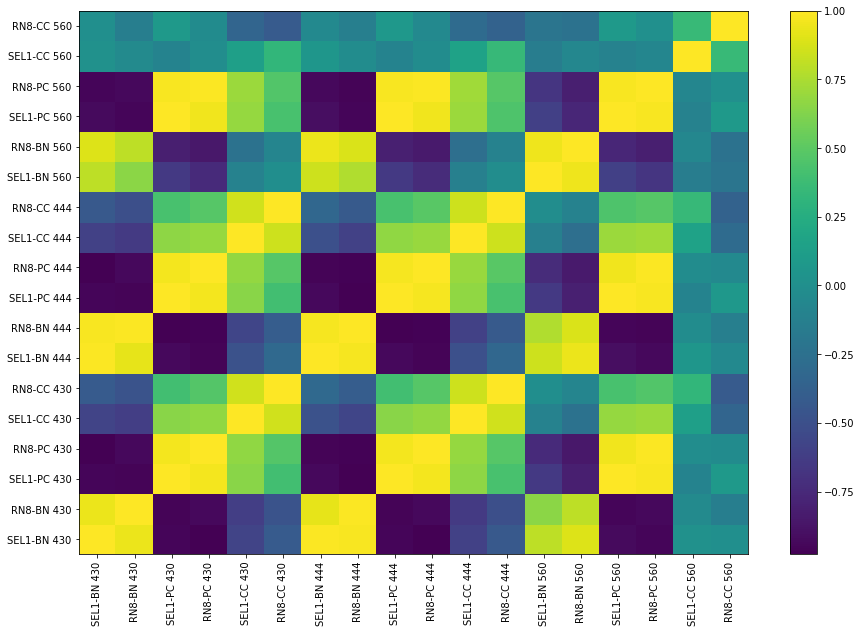

In [9]:
# Correlation plot
ax = plt.figure(figsize=(15,10))
plt.pcolor(sensor_correlations)
plt.colorbar()
ax = plt.gca()
ax.set_yticks(np.arange(len(sensor_correlations.columns))+0.5)
ax.set_xticks(np.arange(len(sensor_correlations.index))+0.5)
ax.set_xticklabels(sensor_correlations.index, rotation="vertical")
ax.set_yticklabels(sensor_correlations.columns);

#### What the plot says:

- sensors that have a commen dye are correlated (RN8-PC and SEL1-PC, though sensors that have same peptides does not mean they are correlated.

- there's not a lot of difference among the wavelengths used (hence, the 3 x 3 yellow squares--there are three wavelengths per sensor), except maybe for SEL1-CC and RN8-CC.


### Wine correlations

In [10]:
wine_correlations = pd.DataFrame.corr(data_means.transpose())

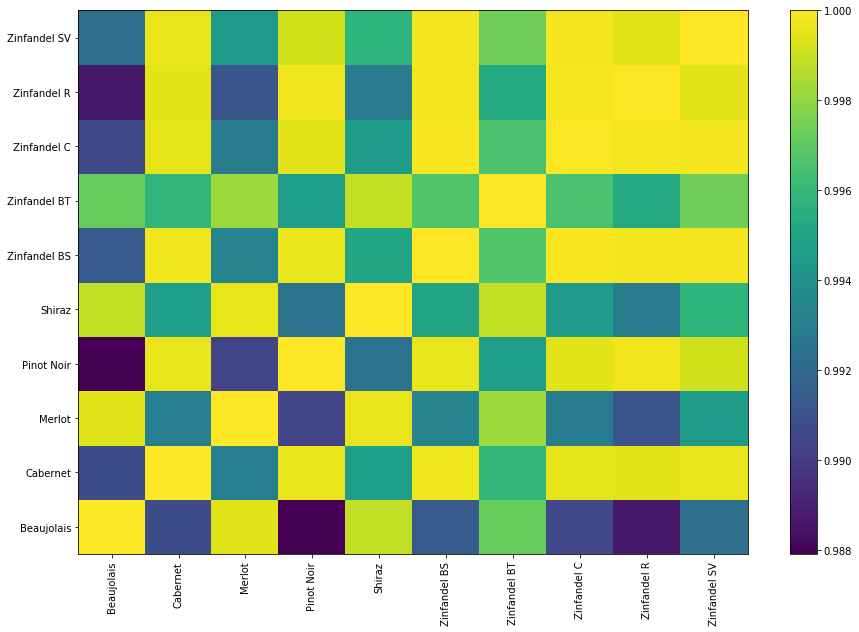

In [11]:
ax = plt.figure(figsize=(15,10))
plt.pcolor(wine_correlations)
plt.colorbar()
ax = plt.gca()
ax.set_yticks(np.arange(len(wine_correlations.columns))+0.5)
ax.set_xticks(np.arange(len(wine_correlations.index))+0.5)
ax.set_xticklabels(wine_correlations.index, rotation="vertical")
ax.set_yticklabels(wine_correlations.columns);

### Clustering

In [12]:
from sklearn.cluster.bicluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters=6, random_state=42)
model.fit(wine_correlations)

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=6,
           n_init=10, n_jobs=1, n_svd_vecs=None, random_state=42,
           svd_method='randomized')

In [13]:
np.sum(model.rows_, axis=1)


array([1, 4, 1, 1, 2, 1])

In [14]:
model.row_labels_

array([0, 4, 2, 4, 5, 1, 3, 1, 1, 1], dtype=int32)

### Replotting based on clusters

In [15]:
data_means_wines_clusters = data_means.reset_index()
data_means_wines_clusters

,index,SEL1-BN 430,RN8-BN 430,SEL1-PC 430,RN8-PC 430,SEL1-CC 430,RN8-CC 430,SEL1-BN 444,RN8-BN 444,SEL1-PC 444,RN8-PC 444,SEL1-CC 444,RN8-CC 444,SEL1-BN 560,RN8-BN 560,SEL1-PC 560,RN8-PC 560,SEL1-CC 560,RN8-CC 560
0,Beaujolais,0.081963,0.084875,0.403300,0.432088,0.826725,0.826600,0.078487,0.082462,0.390838,0.419913,0.790100,0.790613,0.268587,0.272675,0.299912,0.320462,0.091450,0.090512
1,Cabernet,0.070288,0.070175,0.508737,0.499012,0.864000,0.849463,0.068825,0.069125,0.494100,0.484775,0.829450,0.815638,0.258337,0.251300,0.392037,0.386288,0.096738,0.098325
2,Merlot,0.081763,0.080550,0.418150,0.425438,0.799825,0.818912,0.077088,0.079700,0.405488,0.413375,0.768225,0.788025,0.270838,0.264913,0.310412,0.318887,0.097213,0.104200
3,Pinot Noir,0.069800,0.069137,0.518200,0.518537,0.875862,0.854387,0.067425,0.067513,0.501925,0.502000,0.839925,0.820138,0.249000,0.241050,0.402388,0.408212,0.106762,0.107325
4,Shiraz,0.080575,0.080512,0.424438,0.429825,0.802225,0.803438,0.077088,0.078625,0.410788,0.416875,0.772825,0.775362,0.260100,0.261925,0.318425,0.322350,0.115238,0.117587
5,Zinfandel BS,0.070600,0.072837,0.478700,0.486075,0.820512,0.812838,0.067513,0.070050,0.464213,0.472788,0.788288,0.781937,0.238813,0.235625,0.361588,0.369812,0.097563,0.104325
6,Zinfandel BT,0.073600,0.074888,0.450975,0.476050,0.851588,0.873950,0.071500,0.073113,0.437725,0.462063,0.817550,0.836775,0.248425,0.249725,0.337475,0.355012,0.132237,0.099663
7,Zinfandel C,0.071412,0.070850,0.483162,0.494000,0.813700,0.820488,0.068175,0.069263,0.468675,0.476938,0.781300,0.789062,0.239613,0.239913,0.362900,0.372400,0.103137,0.107000
8,Zinfandel R,0.070000,0.074550,0.488350,0.497800,0.815450,0.813525,0.066650,0.070563,0.473825,0.483225,0.783750,0.781825,0.234738,0.233687,0.368312,0.380000,0.098800,0.103437
9,Zinfandel SV,0.069462,0.070137,0.495912,0.498737,0.854087,0.866700,0.067600,0.068975,0.481825,0.484900,0.818000,0.830525,0.250013,0.247537,0.380150,0.384750,0.095237,0.100737


In [16]:
data_means_wines_clusters["Groups"] = pd.Series(model.row_labels_, index=data_means_wines_clusters.index)

In [17]:
data_means_wines_clusters

,index,SEL1-BN 430,RN8-BN 430,SEL1-PC 430,RN8-PC 430,SEL1-CC 430,RN8-CC 430,SEL1-BN 444,RN8-BN 444,SEL1-PC 444,RN8-PC 444,SEL1-CC 444,RN8-CC 444,SEL1-BN 560,RN8-BN 560,SEL1-PC 560,RN8-PC 560,SEL1-CC 560,RN8-CC 560,Groups
0,Beaujolais,0.081963,0.084875,0.403300,0.432088,0.826725,0.826600,0.078487,0.082462,0.390838,0.419913,0.790100,0.790613,0.268587,0.272675,0.299912,0.320462,0.091450,0.090512,0
1,Cabernet,0.070288,0.070175,0.508737,0.499012,0.864000,0.849463,0.068825,0.069125,0.494100,0.484775,0.829450,0.815638,0.258337,0.251300,0.392037,0.386288,0.096738,0.098325,4
2,Merlot,0.081763,0.080550,0.418150,0.425438,0.799825,0.818912,0.077088,0.079700,0.405488,0.413375,0.768225,0.788025,0.270838,0.264913,0.310412,0.318887,0.097213,0.104200,2
3,Pinot Noir,0.069800,0.069137,0.518200,0.518537,0.875862,0.854387,0.067425,0.067513,0.501925,0.502000,0.839925,0.820138,0.249000,0.241050,0.402388,0.408212,0.106762,0.107325,4
4,Shiraz,0.080575,0.080512,0.424438,0.429825,0.802225,0.803438,0.077088,0.078625,0.410788,0.416875,0.772825,0.775362,0.260100,0.261925,0.318425,0.322350,0.115238,0.117587,5
5,Zinfandel BS,0.070600,0.072837,0.478700,0.486075,0.820512,0.812838,0.067513,0.070050,0.464213,0.472788,0.788288,0.781937,0.238813,0.235625,0.361588,0.369812,0.097563,0.104325,1
6,Zinfandel BT,0.073600,0.074888,0.450975,0.476050,0.851588,0.873950,0.071500,0.073113,0.437725,0.462063,0.817550,0.836775,0.248425,0.249725,0.337475,0.355012,0.132237,0.099663,3
7,Zinfandel C,0.071412,0.070850,0.483162,0.494000,0.813700,0.820488,0.068175,0.069263,0.468675,0.476938,0.781300,0.789062,0.239613,0.239913,0.362900,0.372400,0.103137,0.107000,1
8,Zinfandel R,0.070000,0.074550,0.488350,0.497800,0.815450,0.813525,0.066650,0.070563,0.473825,0.483225,0.783750,0.781825,0.234738,0.233687,0.368312,0.380000,0.098800,0.103437,1
9,Zinfandel SV,0.069462,0.070137,0.495912,0.498737,0.854087,0.866700,0.067600,0.068975,0.481825,0.484900,0.818000,0.830525,0.250013,0.247537,0.380150,0.384750,0.095237,0.100737,1


In [18]:
data_means_wines_clusters = data_means_wines_clusters.loc[np.argsort(model.row_labels_)]
data_means_wines_clusters = data_means_wines_clusters.reset_index(drop=True)
data_means_wines_clusters

,index,SEL1-BN 430,RN8-BN 430,SEL1-PC 430,RN8-PC 430,SEL1-CC 430,RN8-CC 430,SEL1-BN 444,RN8-BN 444,SEL1-PC 444,RN8-PC 444,SEL1-CC 444,RN8-CC 444,SEL1-BN 560,RN8-BN 560,SEL1-PC 560,RN8-PC 560,SEL1-CC 560,RN8-CC 560,Groups
0,Beaujolais,0.081963,0.084875,0.403300,0.432088,0.826725,0.826600,0.078487,0.082462,0.390838,0.419913,0.790100,0.790613,0.268587,0.272675,0.299912,0.320462,0.091450,0.090512,0
1,Zinfandel BS,0.070600,0.072837,0.478700,0.486075,0.820512,0.812838,0.067513,0.070050,0.464213,0.472788,0.788288,0.781937,0.238813,0.235625,0.361588,0.369812,0.097563,0.104325,1
2,Zinfandel C,0.071412,0.070850,0.483162,0.494000,0.813700,0.820488,0.068175,0.069263,0.468675,0.476938,0.781300,0.789062,0.239613,0.239913,0.362900,0.372400,0.103137,0.107000,1
3,Zinfandel R,0.070000,0.074550,0.488350,0.497800,0.815450,0.813525,0.066650,0.070563,0.473825,0.483225,0.783750,0.781825,0.234738,0.233687,0.368312,0.380000,0.098800,0.103437,1
4,Zinfandel SV,0.069462,0.070137,0.495912,0.498737,0.854087,0.866700,0.067600,0.068975,0.481825,0.484900,0.818000,0.830525,0.250013,0.247537,0.380150,0.384750,0.095237,0.100737,1
5,Merlot,0.081763,0.080550,0.418150,0.425438,0.799825,0.818912,0.077088,0.079700,0.405488,0.413375,0.768225,0.788025,0.270838,0.264913,0.310412,0.318887,0.097213,0.104200,2
6,Zinfandel BT,0.073600,0.074888,0.450975,0.476050,0.851588,0.873950,0.071500,0.073113,0.437725,0.462063,0.817550,0.836775,0.248425,0.249725,0.337475,0.355012,0.132237,0.099663,3
7,Cabernet,0.070288,0.070175,0.508737,0.499012,0.864000,0.849463,0.068825,0.069125,0.494100,0.484775,0.829450,0.815638,0.258337,0.251300,0.392037,0.386288,0.096738,0.098325,4
8,Pinot Noir,0.069800,0.069137,0.518200,0.518537,0.875862,0.854387,0.067425,0.067513,0.501925,0.502000,0.839925,0.820138,0.249000,0.241050,0.402388,0.408212,0.106762,0.107325,4
9,Shiraz,0.080575,0.080512,0.424438,0.429825,0.802225,0.803438,0.077088,0.078625,0.410788,0.416875,0.772825,0.775362,0.260100,0.261925,0.318425,0.322350,0.115238,0.117587,5


In [19]:
data_means_wines_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
index          10 non-null object
SEL1-BN 430    10 non-null float64
RN8-BN 430     10 non-null float64
SEL1-PC 430    10 non-null float64
RN8-PC 430     10 non-null float64
SEL1-CC 430    10 non-null float64
RN8-CC 430     10 non-null float64
SEL1-BN 444    10 non-null float64
RN8-BN 444     10 non-null float64
SEL1-PC 444    10 non-null float64
RN8-PC 444     10 non-null float64
SEL1-CC 444    10 non-null float64
RN8-CC 444     10 non-null float64
SEL1-BN 560    10 non-null float64
RN8-BN 560     10 non-null float64
SEL1-PC 560    10 non-null float64
RN8-PC 560     10 non-null float64
SEL1-CC 560    10 non-null float64
RN8-CC 560     10 non-null float64
Groups         10 non-null int32
dtypes: float64(18), int32(1), object(1)
memory usage: 1.6+ KB


In [20]:
correlations = pd.DataFrame.corr(data_means_wines_clusters.iloc[:, 1:19].transpose())

(0.0, 10.0, 0.0, 10.0)

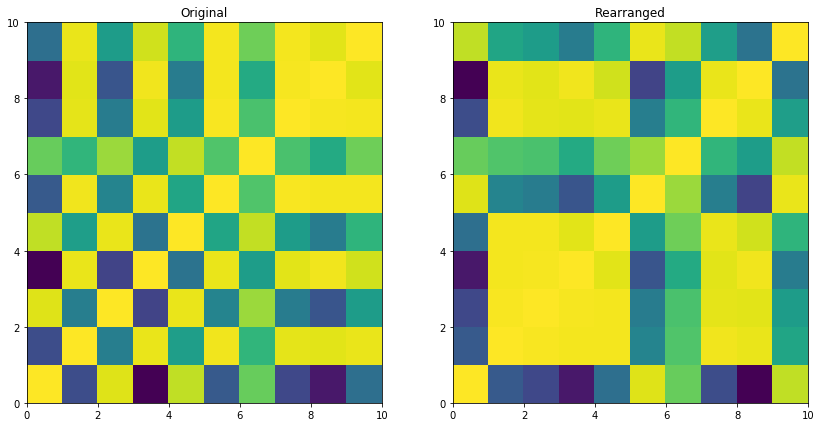

In [21]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(wine_correlations)
plt.title('Original')
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")

In [22]:
correlations

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.991270,0.990535,0.988675,0.992275,0.999389,0.997177,0.990731,0.987907,0.998831
1,0.991270,1.000000,0.999881,0.999795,0.999773,0.993365,0.996661,0.999725,0.999594,0.995004
2,0.990535,0.999881,1.000000,0.999844,0.999780,0.992946,0.996537,0.999507,0.999437,0.994521
3,0.988675,0.999795,0.999844,1.000000,0.999454,0.991104,0.995246,0.999469,0.999719,0.992915
4,0.992275,0.999773,0.999780,0.999454,1.000000,0.994558,0.997316,0.999597,0.999128,0.995764
5,0.999389,0.993365,0.992946,0.991104,0.994558,1.000000,0.998178,0.993045,0.990349,0.999583
6,0.997177,0.996661,0.996537,0.995246,0.997316,0.998178,1.000000,0.995807,0.994574,0.998912
7,0.990731,0.999725,0.999507,0.999469,0.999597,0.993045,0.995807,1.000000,0.999616,0.994660
8,0.987907,0.999594,0.999437,0.999719,0.999128,0.990349,0.994574,0.999616,1.000000,0.992524
9,0.998831,0.995004,0.994521,0.992915,0.995764,0.999583,0.998912,0.994660,0.992524,1.000000


In [23]:
data_means_wines_clusters_T = data_means_wines_clusters.iloc[:, 1:19].transpose()

In [24]:
data_means_wines_clusters_T

,0,1,2,3,4,5,6,7,8,9
SEL1-BN 430,0.081963,0.070600,0.071412,0.070000,0.069462,0.081763,0.073600,0.070288,0.069800,0.080575
RN8-BN 430,0.084875,0.072837,0.070850,0.074550,0.070137,0.080550,0.074888,0.070175,0.069137,0.080512
SEL1-PC 430,0.403300,0.478700,0.483162,0.488350,0.495912,0.418150,0.450975,0.508737,0.518200,0.424438
RN8-PC 430,0.432088,0.486075,0.494000,0.497800,0.498737,0.425438,0.476050,0.499012,0.518537,0.429825
SEL1-CC 430,0.826725,0.820512,0.813700,0.815450,0.854087,0.799825,0.851588,0.864000,0.875862,0.802225
RN8-CC 430,0.826600,0.812838,0.820488,0.813525,0.866700,0.818912,0.873950,0.849463,0.854387,0.803438
SEL1-BN 444,0.078487,0.067513,0.068175,0.066650,0.067600,0.077088,0.071500,0.068825,0.067425,0.077088
RN8-BN 444,0.082462,0.070050,0.069263,0.070563,0.068975,0.079700,0.073113,0.069125,0.067513,0.078625
SEL1-PC 444,0.390838,0.464213,0.468675,0.473825,0.481825,0.405488,0.437725,0.494100,0.501925,0.410788
RN8-PC 444,0.419913,0.472788,0.476938,0.483225,0.484900,0.413375,0.462063,0.484775,0.502000,0.416875


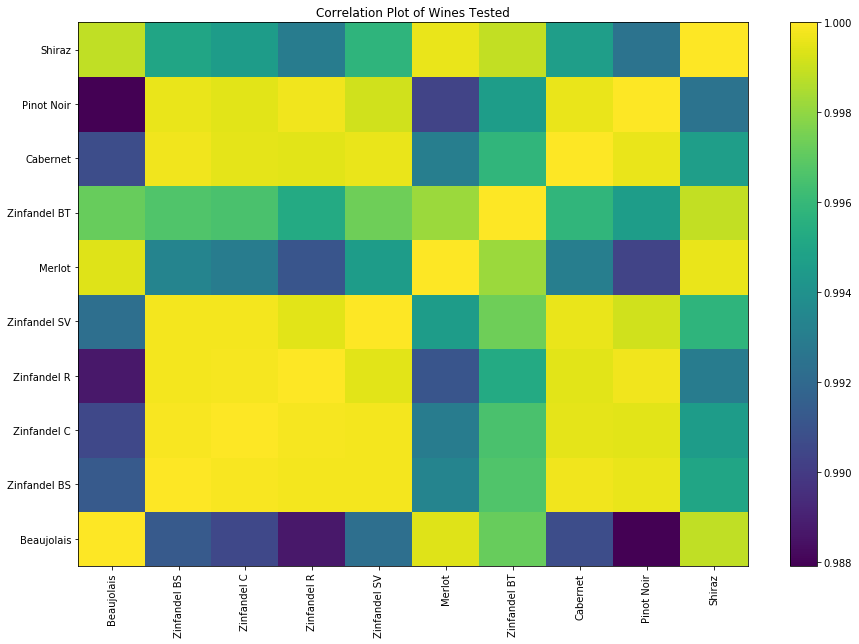

In [27]:
ax = plt.figure(figsize=(15,10))
plt.pcolor(correlations)
plt.colorbar()
ax = plt.gca()
ax.set_yticks(np.arange(len(correlations.columns))+0.5)
ax.set_xticks(np.arange(len(correlations.index))+0.5)
ax.set_xticklabels(data_means_wines_clusters["index"], rotation="vertical")
ax.set_yticklabels(data_means_wines_clusters["index"])
ax.set_title("Correlation Plot of Wines Tested");